# Real estate market research

The data of the Yandex service is at your disposal.Real estate-an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate objects. Your task is to set the parameters. This will allow you to build an automated system: it will track anomalies and fraudulent activity.

There are two types of data available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, the airport, the nearest park and a reservoir.

Here is a study of the real estate market of St. Petersburg and the Leningrad region. The purpose of this study is to identify factors affecting the value of real estate to create an automated system that allows you to determine the market value of real estate and track fraudulent actions and anomalies.
Content: 
1. [Data research](#paragraph1)
2. [Data preprocessing](#paragraph2)
3. [Preparing data for analysis](#paragraph3)
4. [Data analysis](#paragraph4)
5. [Conclusion](#paragraph5)

### 1. Data research <a name="paragraph1"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import numpy as np
from datetime import datetime  # to get days of week
pd.options.mode.chained_assignment = None

estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
estate.head(20)



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Local conclusion

There are a lot of gaps in the table, most of all in the columns "is_apartment" and "ceiling_height". Most likely, people simply do not know this data (and they are too lazy to measure it). But there are also gaps in the data that do not depend on the user - days_exposition In some apartments, the kitchen area exceeds the living area. According to the rest of the data, there are no obvious anomalies yet. Let's look at the general information:

In [2]:
estate.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [3]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

There are ceilings for Gulivers about 100m and for midgets up to 1m. Apartments with 19 rooms are alarming, but in St. Petersburg they do not look out of the ordinary...  
Otherwise, the data seems normal  
There are really the most passes in the data in the "is_apartment" column, as well as in information about the distance and the number of parks (The conclusion is that people in St. Petersburg have few dogs and they are reluctant to go jogging:))
Most likely, these data are not necessary when filling out the card, most likely, users miss this information due to ignorance in the case of apartments - a relatively new concept in the real estate market or due to insignificance in the case of parks

**Conclusion:** We will work on the omissions

### 2. Data preprocessing <a name="paragraph2"></a>

Let's look in detail at the missing data and try to find out the reason for their appearance:   
- ceiling_height - most likely people missed this point, because most likely they do not know the height. Since there are a lot of missing data, it makes no sense to search for the ceiling height for each building and compare them with the missing data - let's take the median value  
- balcony - I believe that the omission here is due to the absence of a balcony, so we fill in the missing values 0  
- days_exposition - an important value showing the liquidity of the property. Neither filling in "0" nor substituting the average value will give an adequate picture.  
Therefore, it is better to leave the data in the form in which they are in the parks_around3000 file
- parks_nearest  
- ponds_around3000  
- ponds_nearest  
The lack of information can be related both to the real rebound of the park, and to the attitude to this issue with the user - We will not fill in the missing values with anything. (If there is enough time, we can establish a connection between the speed of sale and the price of an apartment and information about parks) kitchen_area - there is an assumption that the kitchen area may not be specified for two reasons:  
1-the user does not know exactly what to write and skips,  
2 - these are studios that do not have a separate kitchen.  
Let's check the second assumption.  
- is_apartment - it is logical to assume, based on the tgo, that such an object is not familiar to the user, that if the value is omitted, then the real estate object is not apartments.  
Fill in the column according to this logic.  
- floors_total - fill in the passes by calculating the average value in the center (houses are usually no higher than 9 floors) and in residential areas airports_nearest,  
- cityCenters_nearest - The number of passes is the same.  
Let's check the version: if these apartments are already in the center, then we will fill in "0", if not, then we will not fill in the pass


In [4]:

estate['ceiling_height'].isnull().sum()

9195

In [5]:
estate['ceiling_height'] = estate['ceiling_height'].fillna(estate['ceiling_height'].median())

In [6]:
estate['ceiling_height'].isnull().sum()

0

In [7]:
estate['ceiling_height'].head()

0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
Name: ceiling_height, dtype: float64

In [8]:
estate['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [9]:
print('Median value of high of ceilings:', estate['ceiling_height'].median())

Median value of high of ceilings: 2.65


In [10]:
estate[['locality_name', 'ceiling_height']].head(10)

,locality_name,ceiling_height
0,Санкт-Петербург,2.70
1,посёлок Шушары,2.65
2,Санкт-Петербург,2.65
3,Санкт-Петербург,2.65
4,Санкт-Петербург,3.03
5,городской посёлок Янино-1,2.65
6,посёлок Парголово,2.65
7,Санкт-Петербург,2.65
8,посёлок Мурино,2.65
9,Санкт-Петербург,2.50


the gaps in the 'ceiling_height' column are filled in

Fill in the gaps in the 'balcony' column 0 where the value is not specified

In [11]:
estate['balcony'] = estate['balcony'].fillna(0)
print('gaps in the balcony column =', estate['balcony'].isnull().sum())

gaps in the balcony column = 0


If most of the missing balconies will be on the first floors, then the theory of omissions in the value of the number of balconies is correct

In [12]:
balcony_first_floor = estate.query('floor == 1')
#balcony_first_floor.head(20)
balcony_first_floor['balcony'].describe()

count    2917.000000
mean        0.241344
std         0.691436
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: balcony, dtype: float64

The theory was confirmed - there are almost never balconies on the first floors (in Russia)

Let's see how many and how many values are filled in the is_appartments column

In [13]:
estate['is_apartment'] = estate['is_apartment'].fillna(0)
estate['is_apartment'].value_counts()

0       23649
True       50
Name: is_apartment, dtype: int64

After all, the apartments are still exotic. So the number of 50 pieces looks quite real.

###### Changing types of data
*last_price* - data types to an integer type, because pennies are superfluous when it comes to the cost of an apartment;  
*total_area* - rounded to the 1st decimal place. In small apartments, every dm2 counts;  
*first_day_exposition* - dates in datetime;  
*ceiling_height*-rounded to the 1st decimal place;  
*floors_total, balcony* - to an integer type;  
*living_area, kitchen_area* -rounded to the 1st decimal place;  
*airports_nearest, city Center s_nearest, parks_around 3000, parks_nearest, points_around 3000, ponds_nearest* - to integer type(long distances);  
*days_exposition* - to integer type (days);  

A list with columns that are reduced to an integer format:Список со столбцами, которые приводим к целочисленному формату:

In [14]:
to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition',]

Changing the format in the to_int list to int:

In [15]:
for column in to_int:
    estate[column] = estate[estate[column].notnull()][column].astype('int64')

A list of columns whose values are rounded to one digit after ","

In [16]:
to_float_1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']

Rounding the values in the *to_float_1* column by int:

Changing the data in the *first_day_exposition* column to the datetime format

In [17]:
estate['first_day_exposition'] = pd.to_datetime(estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


Checking result:

In [18]:
estate.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,0,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,0,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,0,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,0,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,0,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,0,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,0,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,NaN,22,0,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,0,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,0,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### 3. Calculate and add to the table <a name="paragraph3"></a>

Add the price of m2:

In [19]:
estate['price_m2'] = estate['last_price']/estate['total_area']

Year and month of publication:

In [20]:
estate['year'] = estate['first_day_exposition'].apply(lambda x: x.year)
estate['month'] = estate['first_day_exposition'].apply(lambda x: x.month)

To add the day of the week when the ad is published, put the day of the week in the number format (1-Monday, 7-Sunday):

In [21]:
estate['day'] = estate['first_day_exposition'].apply(lambda x: x.isoweekday())


Creating a dictionary to change the value from numbers to text:

In [22]:
weekdays = {1: 'понедельник', 2: 'вторник', 3: 'среда', 4: 'четверг', 
                    5: 'пятница', 6: 'суббота', 7: 'воскресенье'}

Changing the values:

In [23]:
estate['day'] = estate['day'].map(weekdays)

Adding a category by floor:

In [24]:
estate['level'] = np.where(estate['floor'] == 1, 'первый', 'другой')
estate['level'] = np.where(estate['floor'] == estate['floors_total'], 'последний', estate['level'])

Let's add columns with the ratio S residential/S general and S kitchen / S general:

In [25]:
estate['living_area_part'] = estate['living_area']/estate['total_area']
estate['kitchen_area_part'] = estate['kitchen_area']/estate['total_area']

Let's check the result:

In [26]:
estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,year,month,day,level,living_area_part,kitchen_area_part
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,0,...,2.0,755.0,NaN,120370.370370,2019,3,четверг,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,0,...,0.0,NaN,81.0,82920.792079,2018,12,вторник,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,0,...,2.0,574.0,558.0,92785.714286,2015,8,четверг,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,0,...,3.0,234.0,424.0,408176.100629,2015,7,пятница,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,0,...,1.0,48.0,121.0,100000.000000,2018,6,вторник,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,0,...,NaN,NaN,55.0,95065.789474,2018,9,понедельник,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,0,...,0.0,NaN,155.0,99195.710456,2017,11,четверг,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,NaN,22,0,...,0.0,NaN,NaN,110544.692737,2019,4,четверг,другой,NaN,0.263966
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,0,...,NaN,NaN,189.0,87454.764777,2018,5,среда,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,0,...,0.0,NaN,289.0,88524.590164,2017,2,воскресенье,другой,0.714754,0.106557


Round up to two commas the values in the columns:  
- living_area_part  
- kitchen_area_part  
  
and convert the values in the price_m2 column to an integer format

In [27]:
to_float_2 = ['living_area_part', 'kitchen_area_part']
for column in to_float_2:
    estate[column] = estate[estate[column].notnull()][column].round(2)
estate['price_m2'] = estate[estate['price_m2'].notnull()]['price_m2'].astype('int')

Let's check it out:

In [28]:
estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,year,month,day,level,living_area_part,kitchen_area_part
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,0,...,2.0,755.0,NaN,120370,2019,3,четверг,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,0,...,0.0,NaN,81.0,82920,2018,12,вторник,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,0,...,2.0,574.0,558.0,92785,2015,8,четверг,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,0,...,3.0,234.0,424.0,408176,2015,7,пятница,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,0,...,1.0,48.0,121.0,100000,2018,6,вторник,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,0,...,NaN,NaN,55.0,95065,2018,9,понедельник,другой,0.47,0.30
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,0,...,0.0,NaN,155.0,99195,2017,11,четверг,другой,0.28,0.39
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,NaN,22,0,...,0.0,NaN,NaN,110544,2019,4,четверг,другой,NaN,0.26
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,0,...,NaN,NaN,189.0,87454,2018,5,среда,другой,0.47,0.27
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,0,...,0.0,NaN,289.0,88524,2017,2,воскресенье,другой,0.71,0.11


In [29]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_arou

In [30]:
estate['cityCenters_nearest'].head()

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
Name: cityCenters_nearest, dtype: float64

Let's group the results of the distance from the center for convenience:  
Center, Center+, Within the ring road, Leningrad region (useful)

In [31]:
def location(row):
    if row['cityCenters_nearest'] < 2500:
        return 'Центр'
    elif row['cityCenters_nearest'] < 5000:
        return 'Центр+'
    elif row['cityCenters_nearest'] < 17000:
        return 'В пределах КАД'
    elif row['cityCenters_nearest'] >= 17000:
        return 'Ленобласть'

In [32]:
estate['center_category'] = estate.apply(location, axis=1)

In [33]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_arou

In [34]:
estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_m2,year,month,day,level,living_area_part,kitchen_area_part,center_category
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,755.0,NaN,120370,2019,3,четверг,другой,0.47,0.23,В пределах КАД
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,0,...,NaN,81.0,82920,2018,12,вторник,первый,0.46,0.27,Ленобласть
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,0,...,574.0,558.0,92785,2015,8,четверг,другой,0.61,0.15,В пределах КАД
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,0,...,234.0,424.0,408176,2015,7,пятница,другой,NaN,NaN,В пределах КАД
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,48.0,121.0,100000,2018,6,вторник,другой,0.32,0.41,В пределах КАД


### 4. Researching data: <a name="paragraph4"></a>

In [35]:
estate[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.348651,6.541549e+06,2.070636,2.724358
std,35.654083,1.088701e+07,1.078405,0.988298
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


The average values of the data in the file are within reasonable limits.  
The file looks quite working.  
However, there are ceilings of 1 and 100 m and apartments with 0 rooms (possibly non-residential premises) 
min the number of m2 is 12, the maximum is 900... the social stratification is obvious(


Let's define outliers in the data:

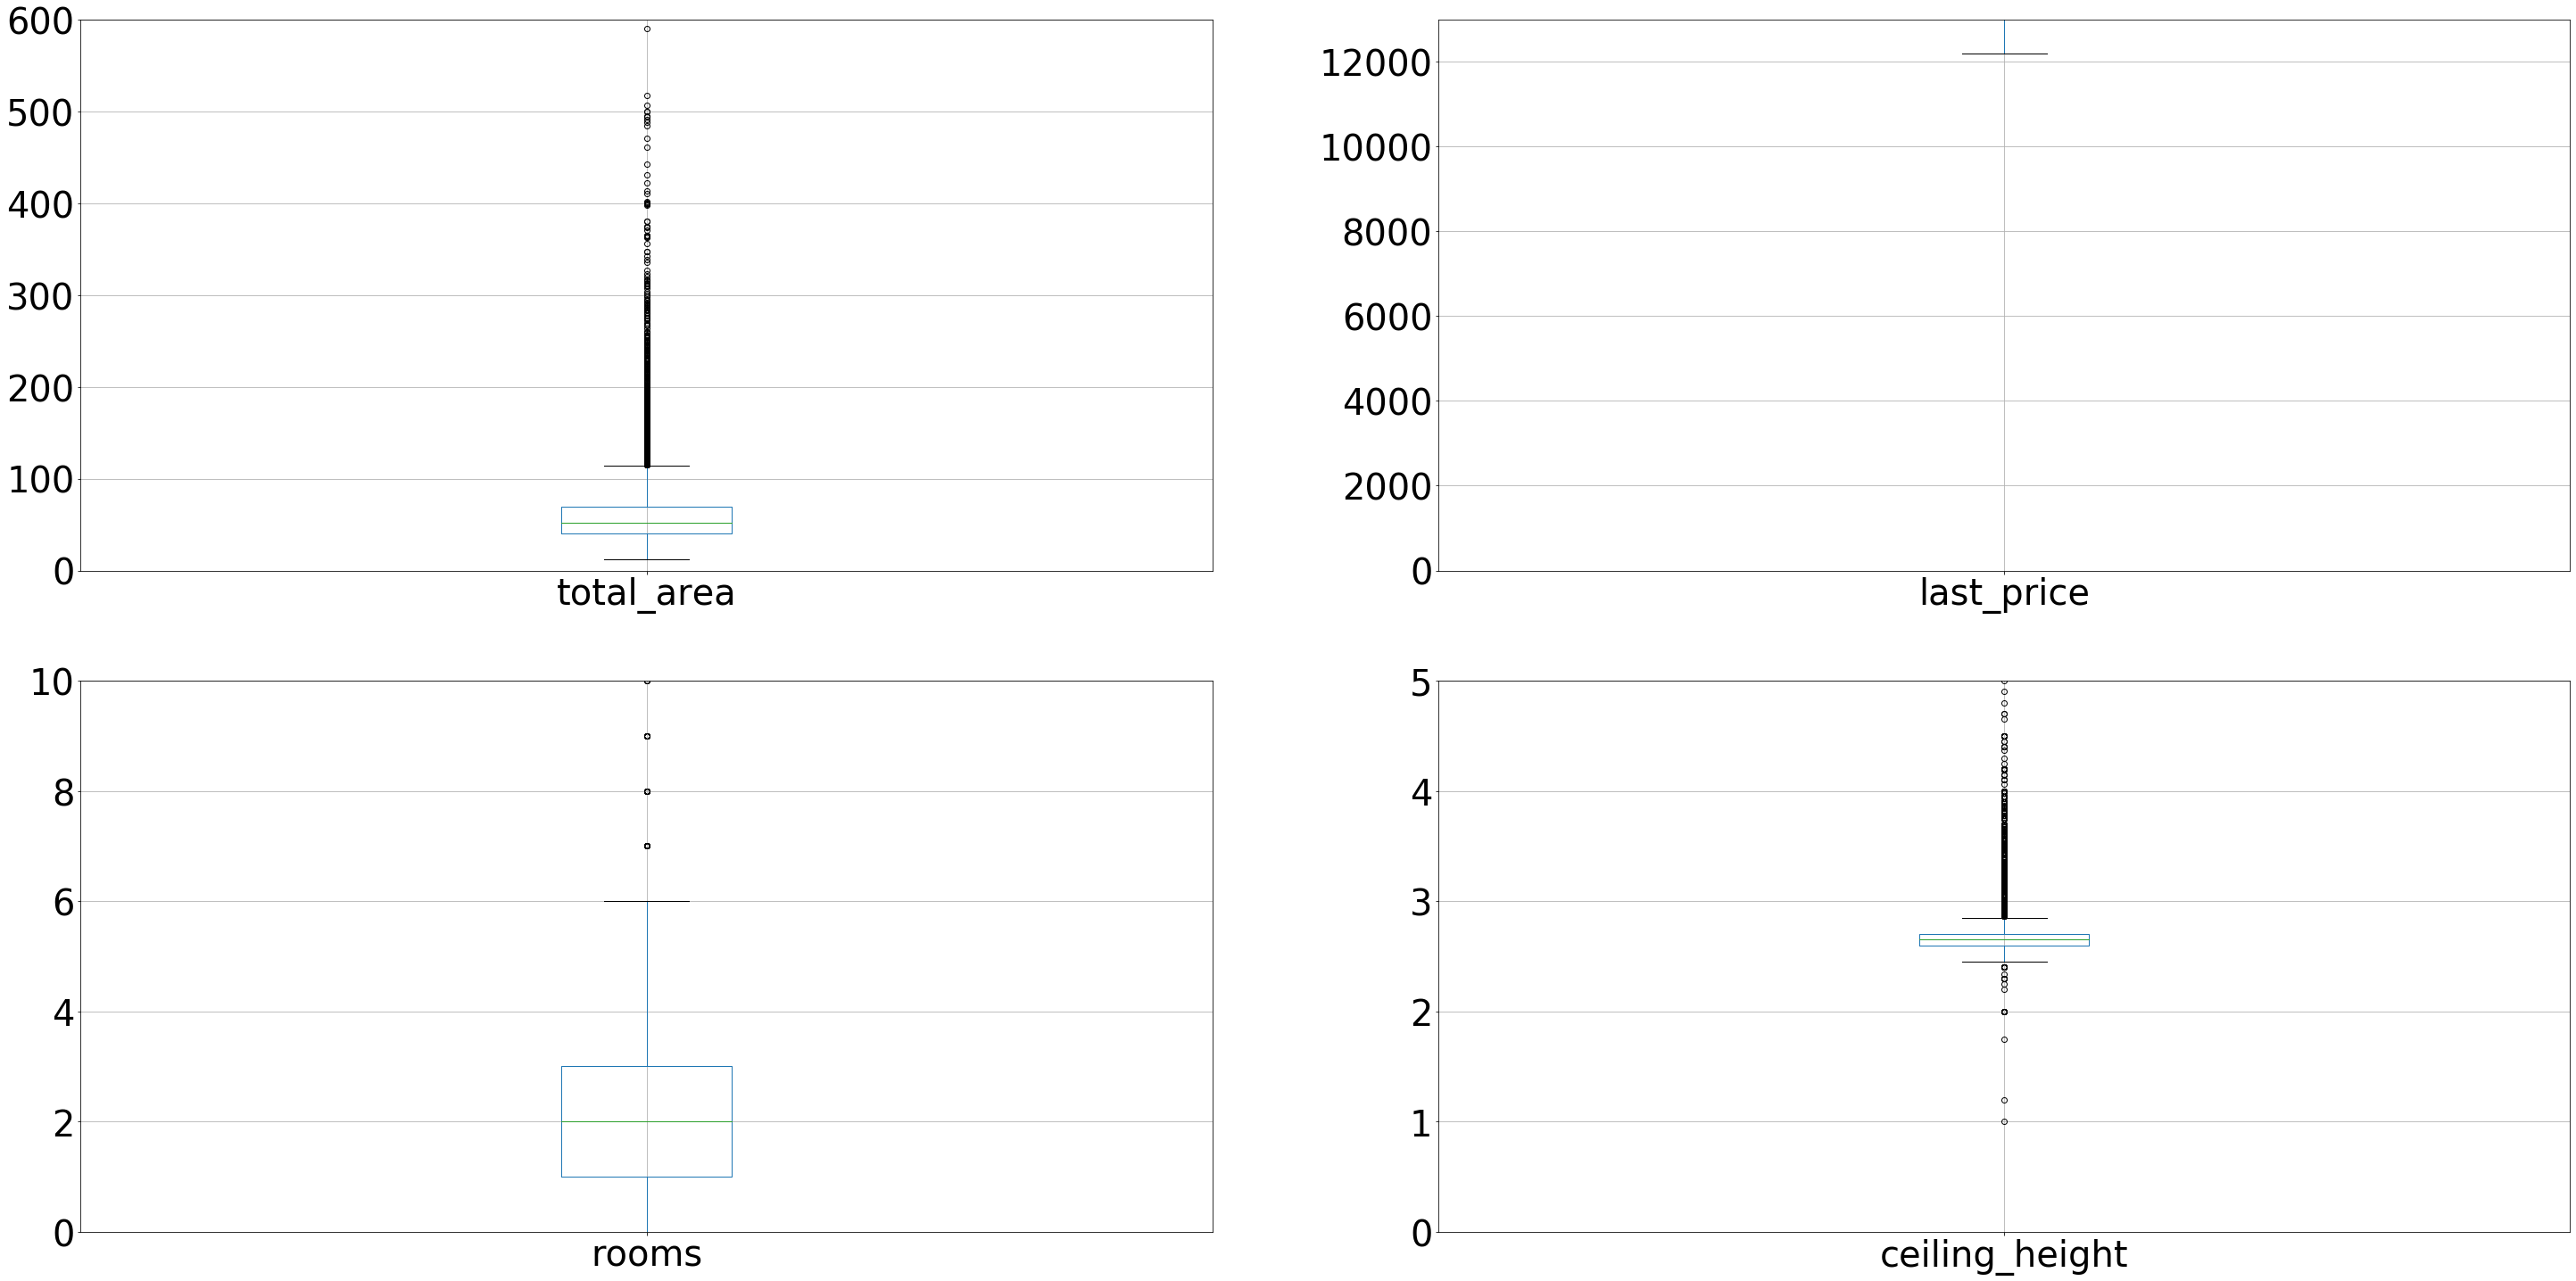

In [36]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [600, 13000, 10, 5]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = estate.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

Normal values:  
- total area 20-130 sq. m.;  
- last price 0-12 sq. m.;  
- rooms-0-6 sq. m.;  
- ceiling height - 2.4-3.25 m.

We will build graphs for the area, price, number of rooms, ceiling height

In [37]:
estate_since = estate[['total_area', 'last_price', 'rooms', 'ceiling_height']]
estate_since.head()

,total_area,last_price,rooms,ceiling_height
0,108.0,13000000,3,2.70
1,40.4,3350000,1,2.65
2,56.0,5196000,2,2.65
3,159.0,64900000,3,2.65
4,100.0,10000000,2,3.03


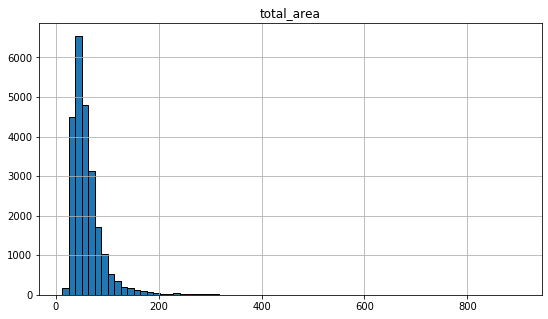

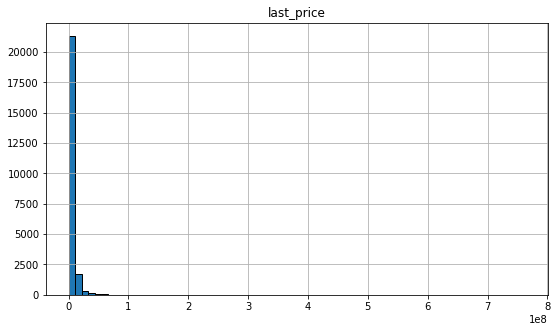

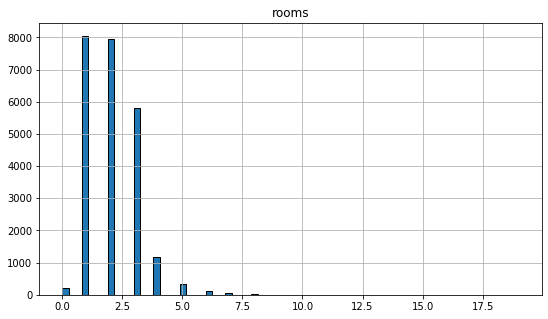

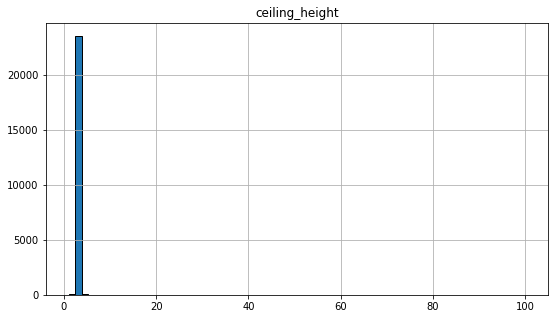

In [38]:
for item in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    estate_since.hist(item, bins = 70, ec='black', figsize = (9,5))

Let's try to get rid of outliers

In [39]:
estate_clear = estate_since.query('20 <= total_area <= 130')

In [40]:
estate_clear = estate_clear.query('last_price <= 13000000')

In [41]:
estate_clear = estate_clear.query('2.40 <= ceiling_height <= 3.25')

In [42]:
estate_clear = estate_clear.query('1 <= rooms <= 6')

In [43]:
estate_clear.describe().style.format({'last_price': '{:.2f}'})

,total_area,last_price,rooms,ceiling_height
count,21297,21297.00,21297,21297
mean,53.5758,4924670.49,1.94732,2.65916
std,18.684,2359831.59,0.888953,0.136088
min,20,12190.00,1,2.4
25%,39.2,3350000.00,1,2.6
50%,50,4450000.00,2,2.65
75%,64,6000000.00,3,2.65
max,130,13000000.00,6,3.25


Let's build graphs without outliers

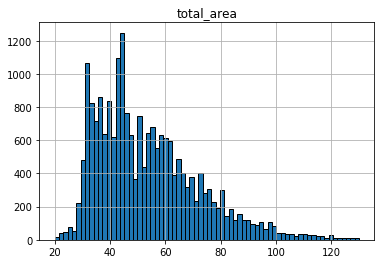

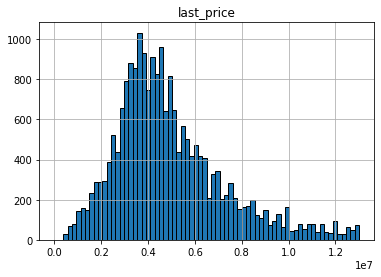

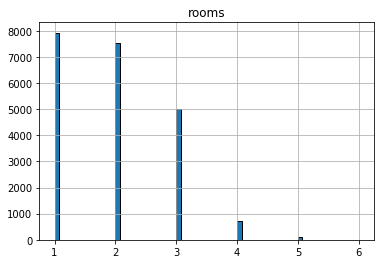

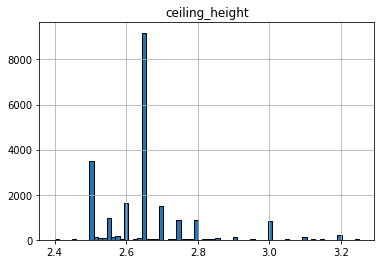

In [44]:
for item in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    estate_clear.hist(item, bins = 70, ec='black')

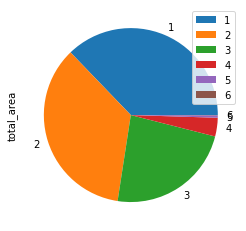

In [45]:
room_s = estate_clear.pivot_table(index = 'rooms', values = 'total_area', aggfunc = 'count')
room_s.plot(y = 'total_area', kind = 'pie')

Conclusion:  
- the most popular apartments for sale are from 30 to 70 m,  
- most apartments cost from 3 to 6 million  
- Most of the apartments for sale are 2 and 3-room,  
- two times less popular apartments of 3 rooms
- most of the apartments have ceilings from 2.5-2.75 m

Let's study the time of sale of the apartment:

In [46]:
estate['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [47]:
print('Median value:', estate['days_exposition'].median())

Median value: 95.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f253ad5a410>]],
      dtype=object)

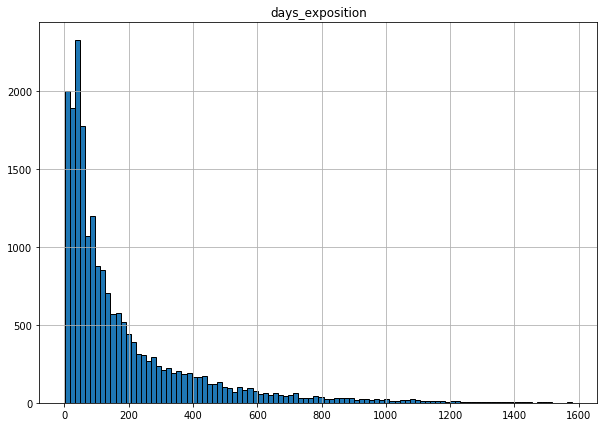

In [48]:
estate.hist('days_exposition', bins=100, figsize=(10,7), ec='black')

The average number of days of sale is 180,  
the maximum is 1580 (five years).  
Possible reasons: the removed ad was not closed automatically,  
the average value also suffers from this.  
A more accurate result is shown by the median-95 days.

Draw a "mustache":

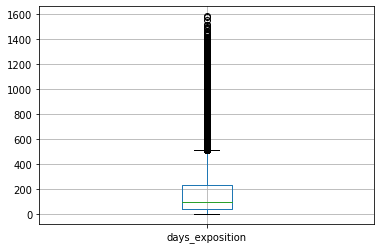

In [49]:
estate.boxplot(column='days_exposition')

We will remove values greater than 500 days from the graph

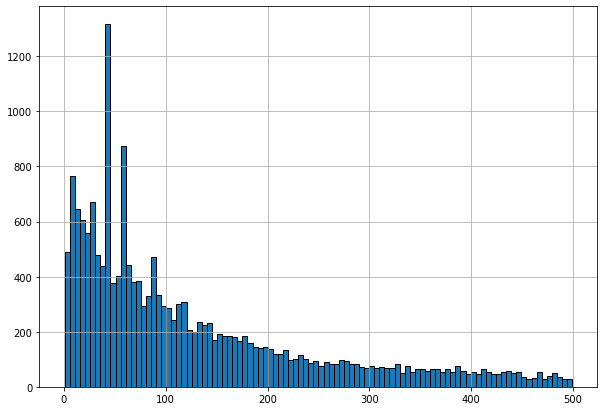

In [50]:
estate.query('days_exposition < 500')['days_exposition'].hist(bins=100, figsize=(10,7), ec='black')

In [51]:
estate_good = estate.query('days_exposition < 500')
estate_good['days_exposition'].describe()

count    18764.000000
mean       127.045726
std        119.120186
min          1.000000
25%         41.000000
50%         84.000000
75%        181.000000
max        499.000000
Name: days_exposition, dtype: float64

In [52]:
estate_good['days_exposition'].median()

84.0

40 and 60 days are the leaders. (It's a little strange that there are such specific spikes. It looks like an artificial push on closing)

Let's look at the reasons that affect the price of an apartment.  
Let's construct and investigate dependency graphs. Before we build graphs, we will create pivot tables

Dependence of the price on the area:

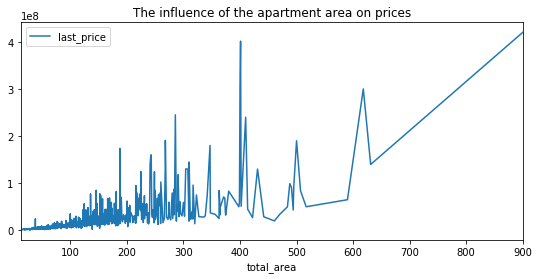

In [53]:
estate_s = estate.pivot_table(index = 'total_area', values = 'last_price').plot(title='The influence of the apartment area on prices', figsize=(9,4))

The obvious influence of the area on the price is visible only after 700 m2.  
Apparently, cottages are expensive, wherever they are, and an apartment of 30 m2 in the center of St. Petersburg is more expensive than 60 meters in the region.  
Let's try to remove the outliers and look again.

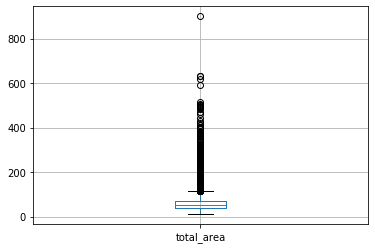

In [54]:
estate.boxplot(column='total_area')

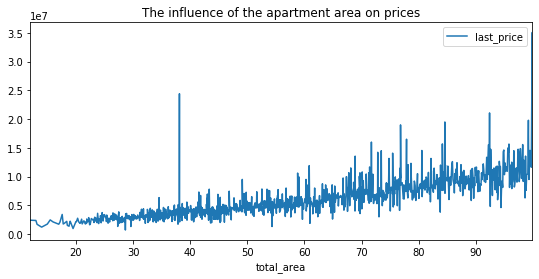

In [55]:
estate.query('total_area < 100').pivot_table(index = 'total_area', values = 'last_price').plot(title='The influence of the apartment area on prices', figsize=(9,4))

In general, the dependence is traced, with the exception of spikes caused (possibly) by the location of the apartment.

Let's check the correlation graphs:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f254453b210>,
      dtype=object)

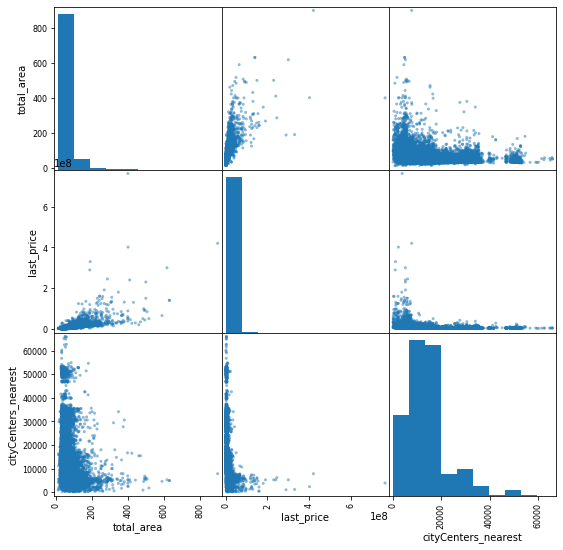

In [56]:
estate_corr = estate.pivot_table(index = 'total_area', values = 'last_price')
estate_corr = estate[['total_area', 'last_price', 'cityCenters_nearest']]
pd.plotting.scatter_matrix(estate_corr, figsize=(9, 9)) 

In [57]:
print(estate_corr.corr()) 


                     total_area  last_price  cityCenters_nearest
total_area             1.000000    0.653675            -0.231446
last_price             0.653675    1.000000            -0.206747
cityCenters_nearest   -0.231446   -0.206747             1.000000


When the area increases, most often the price increases, and when moving away from the center it decreases, but not so clearly.  
My guess is correct

We will write a function for the convenience of plotting graphs, but first we will add a column with grouping by floor to the table:

In [58]:
estate['level'] = np.where(estate['floor'] == 1, 'первый', 'другой')
estate['level'] = np.where(estate['floor'] == estate['floors_total'], 'последний', estate['level'])

In [59]:
def price(df, column):
    title_dict = {'rooms': 'The influence of the number of rooms on prices','level': 'The impact of the floor on the price',
                  'center_category': 'The effect of distance from the center on prices',
                  'day':'Prices by day of the week-Median', 'month': 'Prices by month-Median',
                  'year': 'Prices by year-Median', 'cityCenters_nearest_kms': 'The dependence of the price on the distance from the city center'}
    #title_dict_2 = {'rooms': 'Комнаты','level': 'Влияние этажа на цену', 'center_category': 'Удаление от центра',
                  #'day':'Дни', 'month': 'Месяца',
                  #'year': 'Годы', 'cityCenters_nearest_kms': 'Удалёность от центра'}
    df = estate.pivot_table(index = column, values = 'last_price')
    df = df.groupby(column).median()['last_price'].reset_index().sort_values(by = 'last_price')
    plot_1 = df.plot(x = column, y = 'last_price', title=title_dict[column], kind='bar', ec='black', legend=None, figsize=(9,5))
    #pl.xlabel(title_dict_2[column])
    pl.ylabel("The average price of an apartment, million rubles")
    return plot_1

Let's look at how rooms affect the cost of apartments:

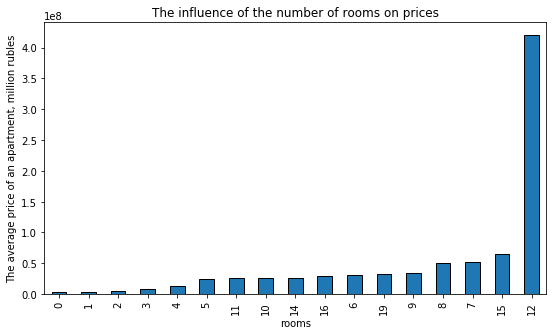

In [60]:
price(estate, 'rooms')

Emissions interfere with it. We'll find them and get rid of them

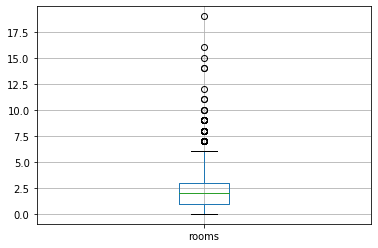

In [61]:
estate.boxplot(column='rooms')


Let's look at the graph without outliers

Text(0, 0.5, 'The average price of an apartment, million rubles')

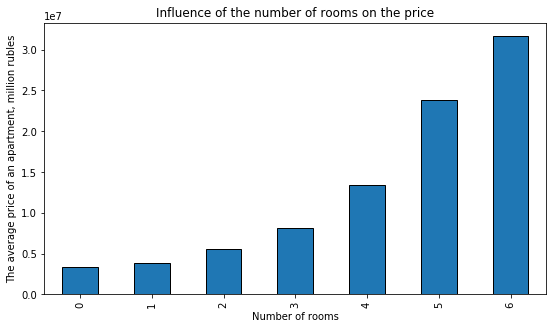

In [62]:
estate_room = estate.pivot_table(index = 'rooms', values = 'last_price').query('rooms <= 6')
estate_room.plot(y = 'last_price', title = 'Influence of the number of rooms', kind='bar', ec='black', legend=None, figsize=(9,5))
pl.title("Influence of the number of rooms on the price")
pl.xlabel("Number of rooms")
pl.ylabel("The average price of an apartment, million rubles")

Text(0, 0.5, 'Price per m2')

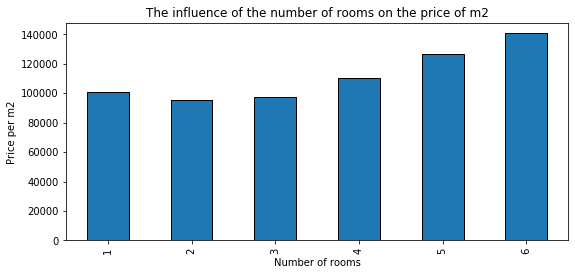

In [63]:
estate_room_meter = estate.pivot_table(index = 'rooms', values = 'price_m2').query('0 < rooms <= 6')
estate_room_meter.plot(y = 'price_m2', title = 'The influence of the number of rooms on the price of m2', kind='bar', ec='black', legend=None, figsize=(9,4))
pl.title("The influence of the number of rooms on the price of m2")
pl.xlabel("Number of rooms")
pl.ylabel("Price per m2")

Let's look again at the graph of the dependence of prices on the distance from the center

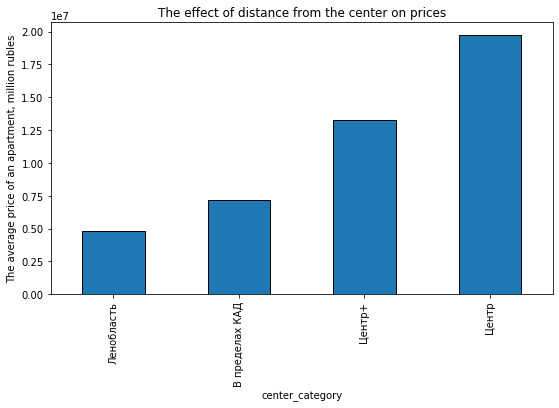

In [64]:
price(estate, 'center_category')

It is clearly visible that apartments in the center are many times more expensive than in the region. Which is not surprising.  
And how does the floor affect the cost?

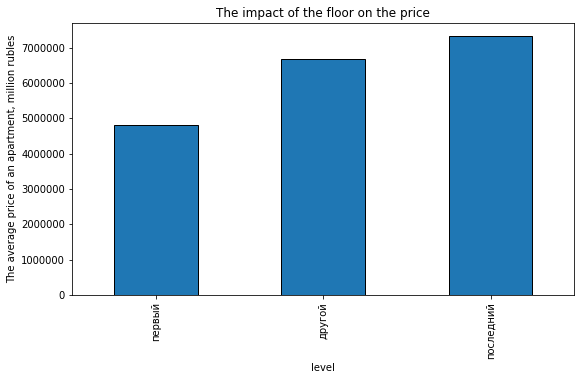

In [65]:
price(estate, 'level')

Oddly enough, but on the top floor of the apartment is more expensive(Although I like it. No one walks on the head).  
On the first one it is significantly cheaper

Let's explore the influence of the day of the week, month and year

In [66]:
def date_price(df, ylims=None):
    date_to_plot = ['day', 'month', 'year']
    titles = ['Median prices by day of the week', 'Median prices by the month', 'Median prices by the year']
    titles_1 = ['day of the week', 'month', 'year']

    for i in range(len(date_to_plot)):
        df_to_plot = estate.groupby(date_to_plot[i]).median()['last_price'].reset_index().sort_values(by=date_to_plot[i])
        if ylims is None:
            plot = df_to_plot.plot(x=date_to_plot[i], y="last_price", kind='bar', figsize=(10,5), ec='black',
                                   legend=False, title=titles[i], fontsize=15)
        else:
            plot = df_to_plot.plot(x=date_to_plot[i], y="last_price", kind='bar', figsize=(10,5), ec='black',
                               legend=False, title=titles[i], fontsize=15, ylim=ylims[i])
        ax2 = plt.gca()
        x_axis = ax2.xaxis
        x_axis.label.set_visible(False)
        if date_to_plot[i] != 'day':
            plt.xticks(rotation=0)
        pl.xlabel("titles_1[i]")
        pl.ylabel("Average price of an apartment, RUB")
    return plot

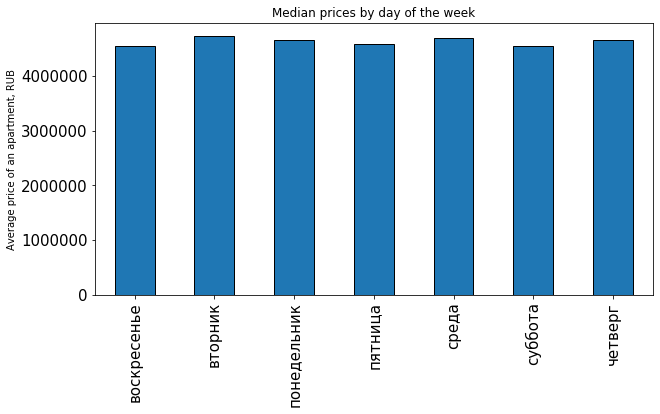

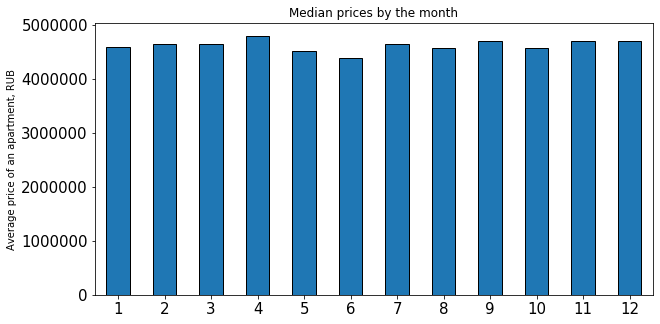

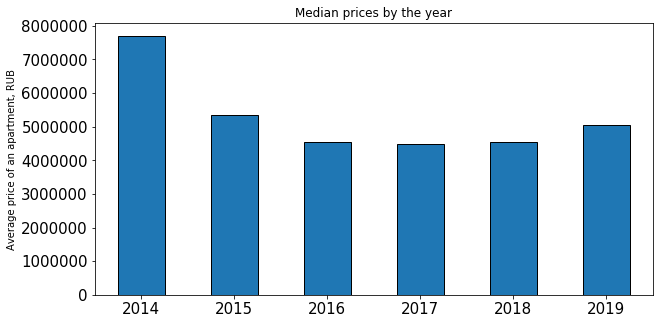

In [67]:
date_price(estate)


Conclusion:
1. There is practically no dependence of prices on the day of the week
2. April is the most "expensive" month (Is it related to the filing of declarations and tax reports?), and in June, the demand for real estate traditionally falls
3. In 2014, we all remember what happened... Therefore, the surge in prices is due to the fact that people tried to somehow save their savings by investing them in real estate. Demand gradually subsided by 2015, and it is trying to recover only starting from 2019 (I wonder what data for 2020 - I assume that there will also be a big surge in late spring and autumn)

In [68]:
print(estate['year'].value_counts())

2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: year, dtype: int64


In [69]:
def date_price_2(df, ylims=None):
    date_to_plot = ['day', 'month', 'year']
    titles = ['Median prices by day of the week', 'Median prices by the month', 'Median prices by the year']
    titles_1 = ['День недели', 'Месяц', 'Год']

    for i in range(len(date_to_plot)):
        df_to_plot = estate.groupby(date_to_plot[i]).count()['last_price'].reset_index().sort_values(by=date_to_plot[i])
        if ylims is None:
            plot = df_to_plot.plot(x=date_to_plot[i], y="last_price", kind='bar', figsize=(10,5), ec='black',
                                   legend=False, title=titles[i], fontsize=15)
        else:
            plot = df_to_plot.plot(x=date_to_plot[i], y="last_price", kind='bar', figsize=(10,5), ec='black',
                               legend=False, title=titles[i], fontsize=15, ylim=ylims[i])
        ax2 = plt.gca()
        x_axis = ax2.xaxis
        x_axis.label.set_visible(False)
        if date_to_plot[i] != 'day':
            plt.xticks(rotation=0)
        pl.xlabel("titles_1[i]")
        pl.ylabel("Number of apartments")
    return plot

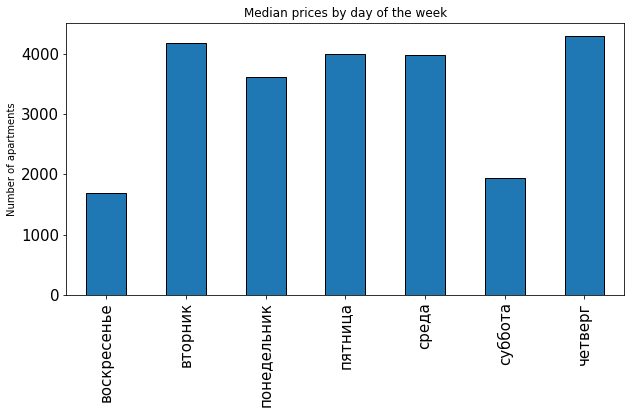

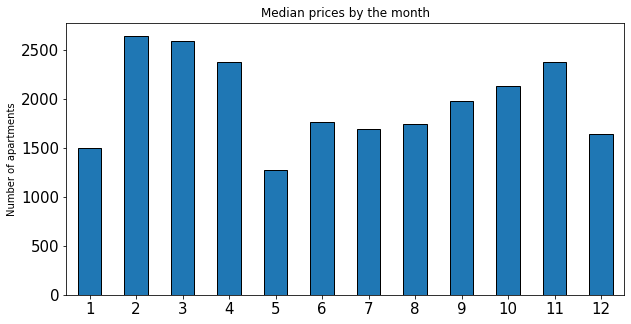

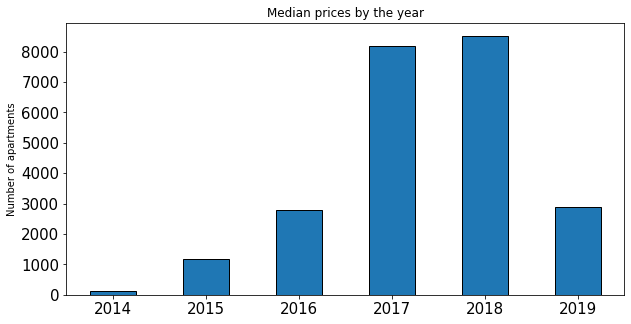

In [70]:
date_price_2(estate)


In [71]:
top_ten = estate['locality_name'].value_counts().index.tolist()[:10]
mean10_metrics = [estate[estate['locality_name'] == city]['price_m2'].median().round(2) for city in top_ten]
mean10_prices = [estate[estate['locality_name'] == city]['last_price'].median() for city in top_ten]
frame = {'Sity': top_ten, 'mean price for sq meter': mean10_metrics, 'mean price for flat': mean10_prices}
dataframe = pd.DataFrame(frame).sort_values(by='mean price for sq meter', ascending=False)
dataframe

,Sity,mean price for sq meter,mean price for flat
0,Санкт-Петербург,104761.0,5500000.0
4,Пушкин,100000.0,5180000.0
8,деревня Кудрово,91860.0,3790000.0
6,посёлок Парголово,91642.0,4100000.0
1,посёлок Мурино,85878.0,3400000.0
2,посёлок Шушары,76876.0,3950000.0
5,Колпино,74723.5,3600000.0
7,Гатчина,67796.0,3100000.0
3,Всеволожск,65789.0,3450000.0
9,Выборг,58158.0,2897000.0


It is predictably more expensive than an apartment in St. Petersburg, and the rest of the data correspond to the principle of reducing the price depending on the distance.  
Pushkin(city), if I'm not mistaken, is considered an attractive place to live.

We will study the offers of apartments in St. Petersburg. Let's select apartments in St. Petersburg by the locality_name column.  
To find out which area is included in the center, we will create a column with the distance to the center in kilometers:   
round it up to integer values.  
Let's find out the average price for each kilometer. Let's build a graph: it will show how the price depends on the distance from the center.  
Let's define the border where the graph changes a lot — this will be our central zone.

In [72]:
sp_estate = estate.query('locality_name == "Санкт-Петербург"')
sp_estate.loc[:, 'cityCenters_nearest_kms'] = (sp_estate.loc[:, 'cityCenters_nearest']/1000).round()
sp_estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_m2,year,month,day,level,living_area_part,kitchen_area_part,center_category,cityCenters_nearest_kms
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,NaN,120370,2019,3,четверг,другой,0.47,0.23,В пределах КАД,16.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,0,...,558.0,92785,2015,8,четверг,другой,0.61,0.15,В пределах КАД,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,0,...,424.0,408176,2015,7,пятница,другой,NaN,NaN,В пределах КАД,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,121.0,100000,2018,6,вторник,другой,0.32,0.41,В пределах КАД,8.0
7,5,7915000,71.6,2019-04-18,2,2.65,24.0,NaN,22,0,...,NaN,110544,2019,4,четверг,другой,NaN,0.26,В пределах КАД,12.0
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,0,...,289.0,88524,2017,2,воскресенье,другой,0.71,0.11,В пределах КАД,15.0
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,0,...,137.0,127525,2017,11,четверг,другой,0.51,0.21,В пределах КАД,14.0
15,16,4650000,39.0,2017-11-18,1,2.65,14.0,20.5,5,0,...,19.0,119230,2017,11,суббота,другой,0.53,0.19,В пределах КАД,14.0
16,11,6700000,82.0,2017-11-23,3,3.05,5.0,55.6,1,0,...,397.0,81707,2017,11,четверг,первый,0.68,0.11,В пределах КАД,11.0
17,6,4180000,36.0,2016-09-09,1,2.65,17.0,16.5,7,0,...,571.0,116111,2016,9,пятница,другой,0.46,0.31,В пределах КАД,15.0


Text(0.5, 0, 'Distance from the center')

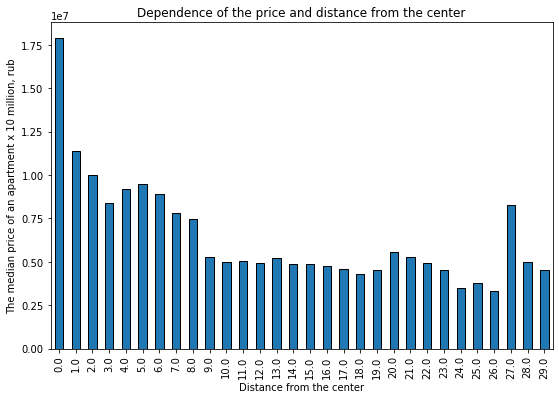

In [73]:
sp_estate.groupby('cityCenters_nearest_kms').median()['last_price'].reset_index().sort_values(by='cityCenters_nearest_kms').plot(x ='cityCenters_nearest_kms', y='last_price', kind = 'bar', ec = 'black', 
                            title = 'Dependence of the price and distance from the center', legend = None, 
                            figsize = (9,6))
pl.ylabel('The median price of an apartment x 10 million, rub')
pl.xlabel('Distance from the center')

The graph shows that the center is limited to a radius of 8 km.  
The graph contains data on real estate located more than 20 km from the center, but nevertheless with an indication of the city of St. Petersburg. Perhaps these are satellite cities?  
Let's see if they are not single outliers  

In [74]:
sp_estate.query('cityCenters_nearest_kms > 17').sort_values(by='cityCenters_nearest_kms', ascending=False)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_m2,year,month,day,level,living_area_part,kitchen_area_part,center_category,cityCenters_nearest_kms
13031,16,4200000,56.8,2018-07-04,2,3.50,3.0,27.90,1,0,...,187.0,73943,2018,7,среда,первый,0.49,0.19,Ленобласть,29.0
10798,10,4850000,62.0,2017-05-16,3,2.65,5.0,35.70,1,False,...,63.0,78225,2017,5,вторник,первый,0.58,0.12,Ленобласть,29.0
19892,20,4370000,54.7,2016-03-23,3,2.50,5.0,32.80,5,0,...,939.0,79890,2016,3,среда,последний,0.60,0.13,Ленобласть,29.0
11652,16,4700000,51.0,2016-06-07,2,2.60,5.0,30.00,1,0,...,539.0,92156,2016,6,вторник,первый,0.59,0.16,Ленобласть,29.0
16787,20,4850000,85.8,2019-04-22,3,3.60,3.0,49.40,2,0,...,NaN,56526,2019,4,понедельник,другой,0.58,0.14,Ленобласть,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,14,3200000,37.4,2018-02-28,1,2.50,9.0,20.00,4,0,...,104.0,85561,2018,2,среда,другой,0.53,0.17,Ленобласть,18.0
12184,7,4400000,36.0,2018-01-10,1,2.50,14.0,20.00,3,0,...,28.0,122222,2018,1,среда,другой,0.56,0.17,Ленобласть,18.0
12154,7,3999000,35.6,2018-11-28,1,2.50,14.0,17.50,14,0,...,NaN,112331,2018,11,среда,последний,0.49,0.22,Ленобласть,18.0
12120,9,3200000,33.4,2017-04-18,1,2.65,9.0,20.26,5,0,...,195.0,95808,2017,4,вторник,другой,0.61,0.16,Ленобласть,18.0


In [75]:
sp_estate_more = sp_estate.query('cityCenters_nearest_kms > 17').sort_values(by='cityCenters_nearest_kms', ascending=False)
sp_estate_more['cityCenters_nearest_kms'].describe()

count    991.000000
mean      20.780020
std        2.521432
min       18.000000
25%       18.000000
50%       21.000000
75%       22.000000
max       29.000000
Name: cityCenters_nearest_kms, dtype: float64

These are clearly not outliers, you do not need to delete the results from the table. St. Petersburg is not round. Maybe at a distance of 20+ there are suburbs from the southern part of the city

Let's start studying the real estate market in the city center. Let's look at the area, price, number of rooms, ceiling height. We will also highlight the factors that affect the cost of an apartment (the number of rooms, the floor, the distance from the center, the date of placement of the ad).  
Let's compare this data with the general data for the city and find out if there are any differences.

To begin with, we will find out how many apartments are offered for sale in the center of St. Petersburg:

In [76]:
center_estate = sp_estate.query('cityCenters_nearest <= 8000')
print('Total on sale', len(center_estate), 'apartments in the city center')


Total on sale 3712 apartments in the city center


Now we will build the same graphs for them as for the total number of apartments

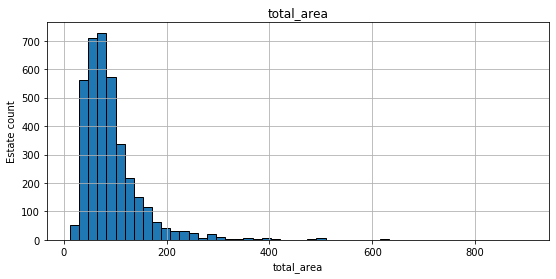

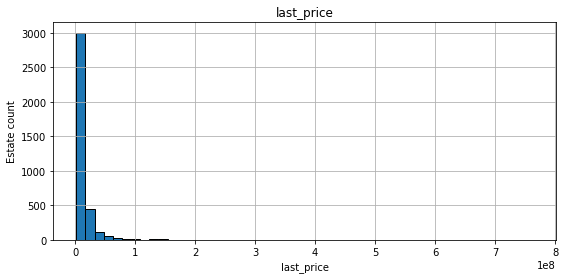

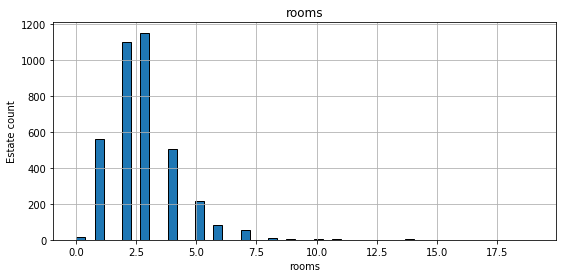

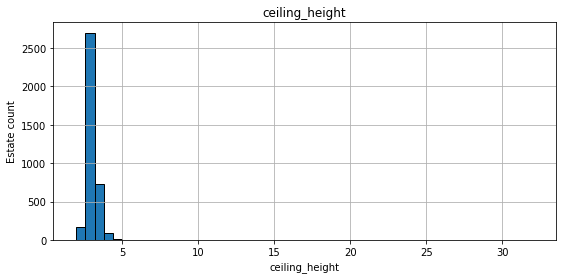

In [77]:
for item in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    center_estate.hist(item, ec = 'black', figsize = (9,4), bins = 50)
    pl.ylabel('Estate count')
    pl.xlabel(item)

The chart does not clearly show the data on prices. Let's try to find and get rid of the outliers.

In [78]:
center_estate.sort_values(by='ceiling_height', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_m2,year,month,day,level,living_area_part,kitchen_area_part,center_category,cityCenters_nearest_kms
22336,19,9999000,92.4,2019-04-05,2,32.00,6.0,55.5,5,False,...,NaN,108214,2019,4,пятница,другой,0.60,0.18,Центр+,4.0
20478,11,8000000,45.0,2017-07-18,1,27.00,4.0,22.0,2,0,...,429.0,177777,2017,7,вторник,другой,0.49,0.22,Центр+,3.0
20264,17,119000000,187.6,2017-07-10,4,6.00,7.0,147.0,7,0,...,259.0,634328,2017,7,понедельник,последний,0.78,0.08,В пределах КАД,6.0
21227,0,8200000,71.0,2017-07-21,0,5.80,5.0,68.0,5,0,...,30.0,115492,2017,7,пятница,последний,0.96,NaN,Центр,1.0
1388,20,59800000,399.0,2015-01-21,5,5.60,6.0,NaN,6,0,...,719.0,149874,2015,1,среда,последний,NaN,NaN,В пределах КАД,7.0
7578,17,38000000,143.0,2017-11-02,3,5.50,5.0,83.0,5,0,...,NaN,265734,2017,11,четверг,последний,0.58,0.20,В пределах КАД,6.0
1026,20,155000000,310.0,2018-10-12,5,5.30,3.0,190.0,3,0,...,NaN,500000,2018,10,пятница,последний,0.61,0.20,Центр+,5.0
12628,14,3900000,50.0,2018-03-29,1,5.30,5.0,NaN,5,0,...,8.0,78000,2018,3,четверг,последний,NaN,NaN,Центр+,4.0
464,15,66571000,280.3,2015-06-11,6,5.20,8.0,159.5,7,0,...,578.0,237499,2015,6,четверг,другой,0.57,0.08,В пределах КАД,7.0
21923,10,115490000,235.0,2017-04-09,5,4.90,5.0,140.0,5,0,...,351.0,491446,2017,4,воскресенье,последний,0.60,0.21,Центр,1.0


In [79]:
center_estate['last_price'].describe()

count    3.712000e+03
mean     1.472962e+07
std      2.470451e+07
min      1.600000e+06
25%      6.590000e+06
50%      9.000000e+06
75%      1.413138e+07
max      7.630000e+08
Name: last_price, dtype: float64

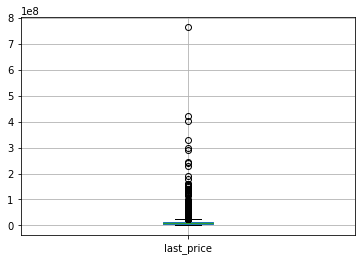

In [80]:
center_estate.boxplot(column='last_price')

Text(0.5, 0, 'last_price x 10 mln')

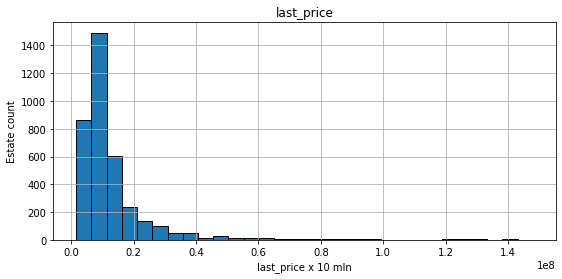

In [81]:
center_estate_price = center_estate.query('last_price < 150000000')
center_estate_price.hist('last_price', ec = 'black', figsize = (9,4), bins = 30)
pl.ylabel('Estate count')
pl.xlabel('last_price x 10 mln')

The data on the ceilings is also not very visible. Remove the outliers

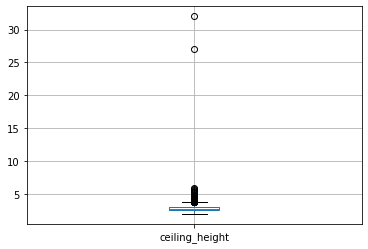

In [82]:
center_estate.boxplot(column='ceiling_height')

Text(0.5, 0, 'ceiling_height')

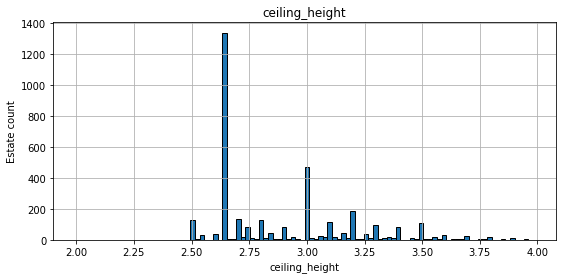

In [83]:
center_estate_ceiling = center_estate.query('ceiling_height < 4')
center_estate_ceiling.hist('ceiling_height', ec = 'black', figsize = (9,4), bins = 100)
pl.ylabel('Estate count')
pl.xlabel('ceiling_height')

Conclusion:  
- most popular apartments for sale are from 50 to 100 m,  
- most apartments cost from 7 to 12 million  
- Most of the apartments for sale are 2 and 3 room  
- most of the apartments have ceilings of 2.7 and 3m  

We investigate the dependence of prices on such factors as: the number of rooms, the floor, the distance from the center, the date of placement of the ad

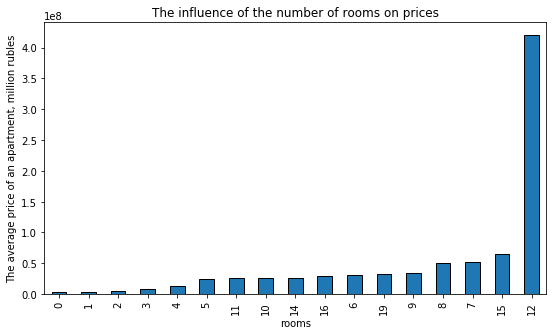

In [84]:
    price(center_estate, 'rooms')

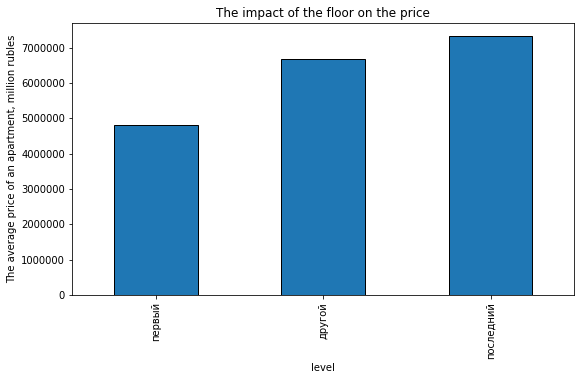

In [85]:
    price(center_estate, 'level')

Text(0.5, 0, 'Distance from the center')

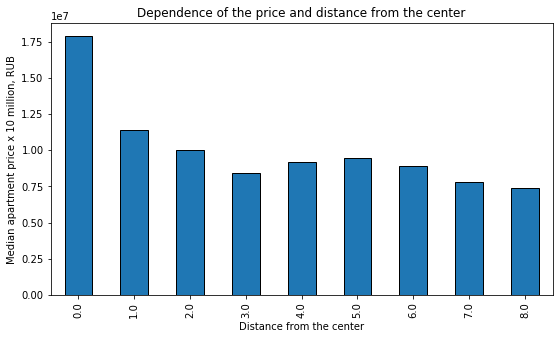

In [86]:
center_estate.groupby('cityCenters_nearest_kms').median()['last_price'].reset_index().sort_values(by='cityCenters_nearest_kms').plot(x ='cityCenters_nearest_kms', y='last_price', kind = 'bar', ec = 'black', 
                            title = 'Dependence of the price and distance from the center', legend = None, figsize = (9,5))
pl.ylabel('Median apartment price x 10 million, RUB')
pl.xlabel('Distance from the center')

There are more prestigious places inside the central zone, regardless of the distance to the center, with the exception of the first two kilometers.

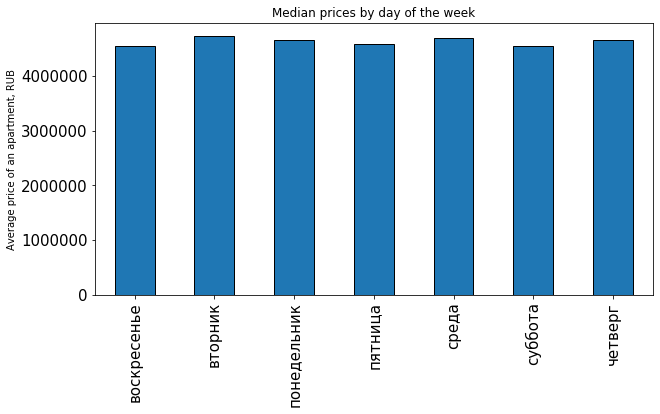

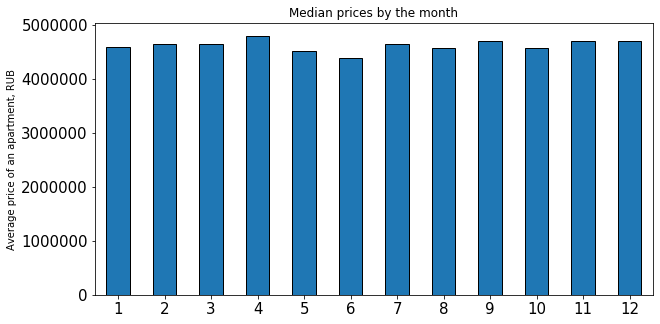

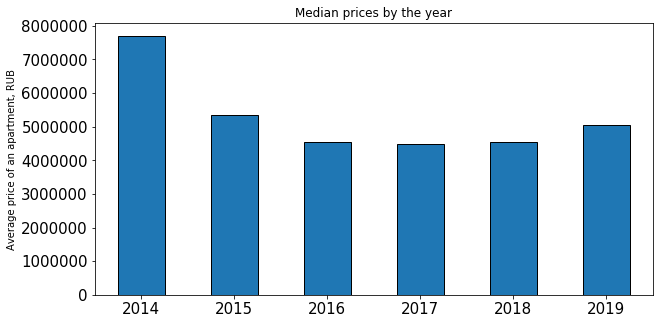

In [87]:
date_price(center_estate)


The difference in sales by day is slightly higher for Wednesday
April is the highest month in the sale of apartments, the end of the year tends to follow it
2014 is the leader (for the reasons mentioned above), and demand tends to grow from 2019

Text(0.5, 0, 'Number of rooms')

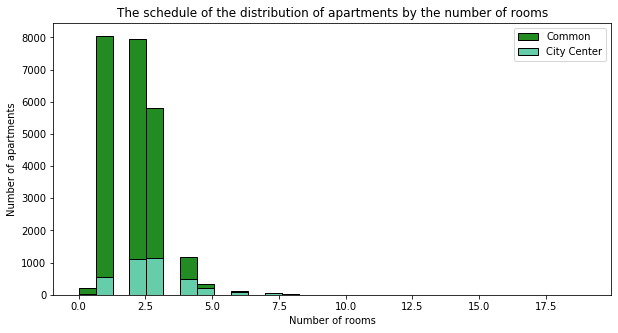

In [88]:
ax = plt.gca()

estate['rooms'].plot(kind='hist', bins = 30, figsize=(10,5), ec='black', ax=ax, color='forestgreen')
center_estate['rooms'].plot(kind='hist', bins = 30, figsize=(10,5), ec='black', ax=ax, color='mediumaquamarine')
plt.legend(['Common', 'City Center'])
pl.title('The schedule of the distribution of apartments by the number of rooms')
pl.ylabel('Number of apartments')
pl.xlabel('Number of rooms')

Text(0.5, 0, 'Number of rooms')

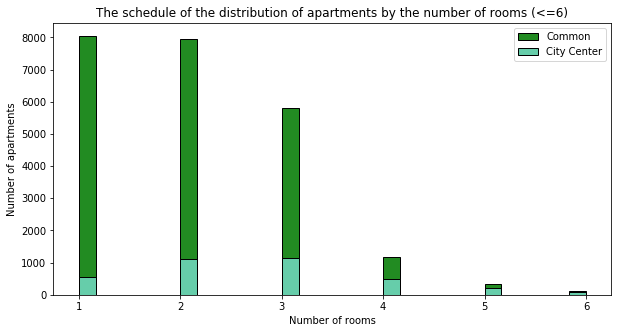

In [89]:
#ax = plt.gca()
estate_rooms = estate.query('0 < rooms <=6')
center_estate_rooms = center_estate.query('0 < rooms <=6')
ax = estate_rooms['rooms'].plot(kind='hist', bins = 30, figsize=(10,5), ec='black', color='forestgreen')
center_estate_rooms['rooms'].plot(kind='hist', bins = 30, figsize=(10,5), ec='black', ax=ax, color='mediumaquamarine')
plt.legend(['Common', 'City Center'])
pl.title('The schedule of the distribution of apartments by the number of rooms (<=6)')
pl.ylabel('Number of apartments')
pl.xlabel('Number of rooms')

In the center, 2 and 3-room apartments are sold more, unlike all other areas where 1-room sales predominate

Let's build a graph for the distribution by floor:

Text(0.5, 0, 'Number of floors')

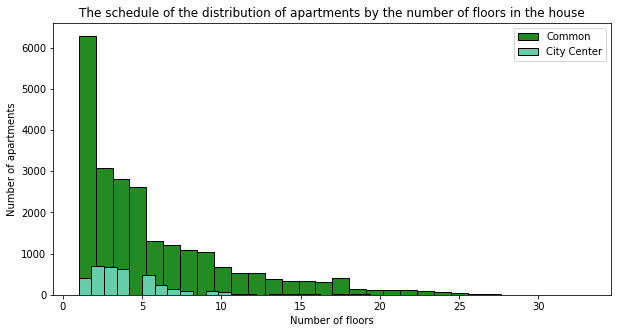

In [90]:
ax = estate['floor'].plot(kind='hist', bins = 30, figsize=(10,5), ec='black', color='forestgreen')
center_estate['floor'].plot(kind='hist', bins = 30, figsize=(10,5), ec='black', ax=ax, color='mediumaquamarine')
plt.legend(['Common', 'City Center'])
pl.title('The schedule of the distribution of apartments by the number of floors in the house')
pl.ylabel('Number of apartments')
pl.xlabel('Number of floors')

Text(0.5, 0, 'Floors')

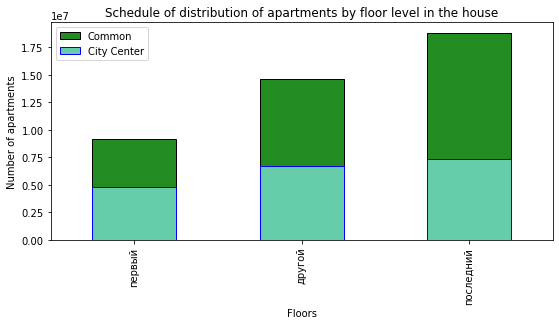

In [91]:
estate_level = estate.pivot_table(index = 'level', values = 'last_price')
estate_level = estate_level.groupby('level').median()['last_price'].reset_index().sort_values(by = 'last_price')
center_level = center_estate.pivot_table(index = 'level', values = 'last_price')
center_level = center_level.groupby('level').median()['last_price'].reset_index().sort_values(by = 'last_price')
ax = center_level.plot(x = 'level', y = 'last_price', kind = 'bar', ec='black', figsize=(9,4), color='forestgreen')

estate_level.plot(x = 'level', y = 'last_price', kind='bar', ax = ax,  ec='blue', figsize=(9,4), color='mediumaquamarine')
plt.legend(['Common', 'City Center'])
plt.legend(['Common', 'City Center'])
pl.title('Schedule of distribution of apartments by floor level in the house')
pl.ylabel('Number of apartments')
pl.xlabel('Floors')

The distribution of prices by floor in the center does not differ from the general

In [92]:
#estate.info()

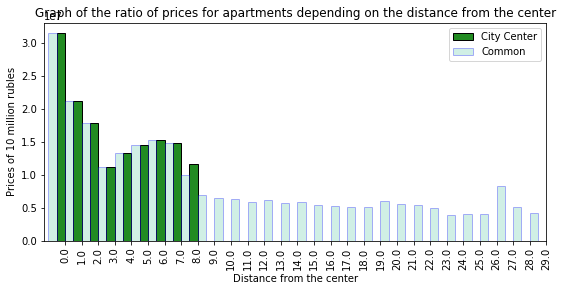

In [93]:
estate_km = sp_estate.pivot_table(index = 'cityCenters_nearest_kms', values = 'last_price')
estate_km = estate_km.groupby('cityCenters_nearest_kms').median()['last_price'].reset_index().sort_values(by='cityCenters_nearest_kms')
center_level_km = center_estate.pivot_table(index = 'cityCenters_nearest_kms', values = 'last_price')
center_level_km = center_level_km.groupby('cityCenters_nearest_kms').median()['last_price'].reset_index().sort_values(by = 'cityCenters_nearest_kms')
ax = plt.gca()
center_level_km.plot(x = 'cityCenters_nearest_kms', y = 'last_price', kind = 'bar', ax = ax, position = 1, ec='black', figsize=(9,4), color='forestgreen')
estate_km.plot(x = 'cityCenters_nearest_kms', y = 'last_price', kind='bar', ax = ax, position = 2, alpha = 0.3, ec='blue', figsize=(9,4), color='mediumaquamarine')
plt.legend(['City Center', 'Common'])
pl.title('Graph of the ratio of prices for apartments depending on the distance from the center')
pl.ylabel('Prices of 10 million rubles')
pl.xlabel('Distance from the center')
plt.show()

Outside the central zone, the tendency to reduce prices depending on the distance is more pronounced, but there are spikes on the outskirts, apparently in prestigious park areas.

In [94]:
#estate_km.head()

In [95]:
#center_level_km.plot(x = 'cityCenters_nearest_kms', y = 'last_price', kind = 'bar', ec='black', figsize=(9,4), color='forestgreen')
#estate_km.plot(x = 'cityCenters_nearest_kms', y = 'last_price', kind='bar', alpha = 0.3, ec='blue', figsize=(9,4), color='mediumaquamarine')

In [96]:
def date_price_combi(list_of_dfs, ylims=None):
    df = {'Город': sp_estate, 'Центр': center_estate}
    date_plot = ['day', 'month', 'year']
    titles = ['Median prices by day of the week', 'Median prices by the month', 'Median prices by the year']
    
    plt.style.use('seaborn-pastel')
    list_of_colors = ['Blue', 'mediumaquamarine']
    legend_list = []
    
    for i in range(len(date_plot)):
        ax = plt.gca()
        plt.figure(figsize=(30,5))
        for df_number in range(len(list_of_dfs)):
            current_df = df[list_of_dfs[df_number]]
            current_df_filtered = current_df.groupby(date_plot[i]).median()['last_price'].reset_index().sort_values(by = date_plot[i])
            if ylims is None:
                plot = current_df_filtered.plot(x = date_plot[i], y='last_price', kind='bar', figsize=(15,6), ec = 'black',
                                               legend=False, title=titles[i], fontsize=15, color=list_of_colors[df_number],
                                               ax=ax, width=0.1, position=df_number)
            else:
                plot = current_df_filtered.plot(x=date_plot[i], y="last_price", kind = 'bar', figsize=(15,6), ec= 'black',
                                               legend=False, title=titles[i], fontsize=15, color=list_of_colors[df_number],
                                               ax=ax, width=0.1, position=df_number, ylim=ylims[i])
                
            legend_list.append(list_of_dfs[df_number])
        x_axis = ax.xaxis
        x_axis.label.set_visible(False)
        ax.legend(legend_list, loc=1, framealpha=0.2)

    
    return plot

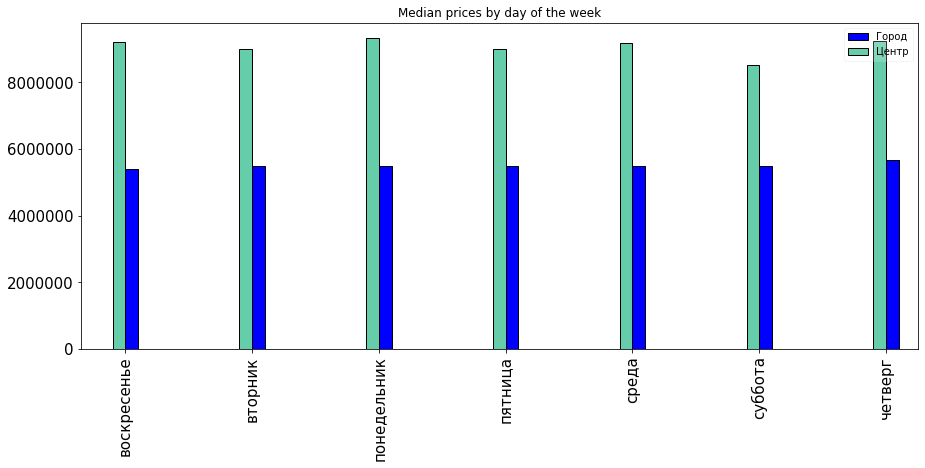

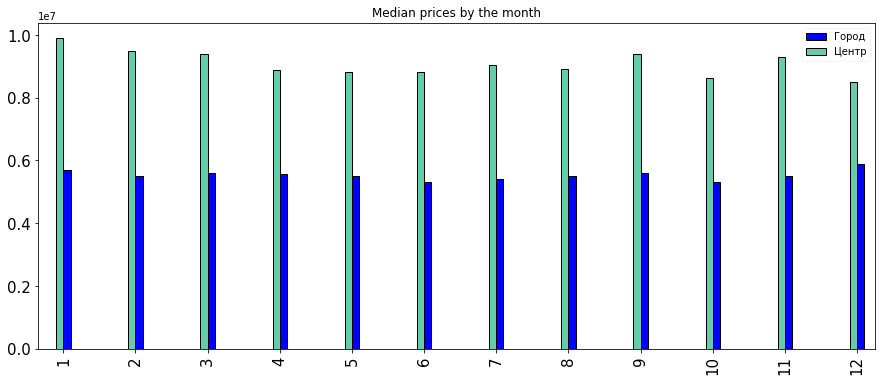

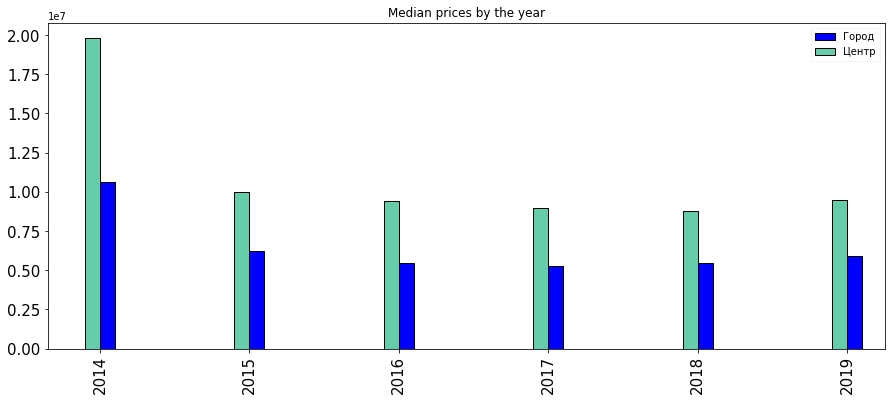

<Figure size 2160x360 with 0 Axes>

In [97]:
date_price_combi(['Город', 'Центр'])

Conclusion:
1. The situation by year, both in the city and in the region (and in the whole country, probably) is not much different: 2014 is a crisis year-a peak for sales, then a sharp decline and stagnation until 2019, when weak growth begins.
2. The situation is slightly different by month:
- if in the center of St. Petersburg (as well as in the whole region) April is a month of growth, then in the whole city from the end of spring (April) to autumn, sales are simple. It's time for vacations, apparently, that affects.
3. If there is no big difference in St. Petersburg on the days of the week, then there are still liber and outsiders in the center:
- on Thursday and Monday, the most apartments are sold
- less on Saturday

Let's make a correlation graph for the entire data table to see the factors that affect the price

In [98]:
#estate. corr()

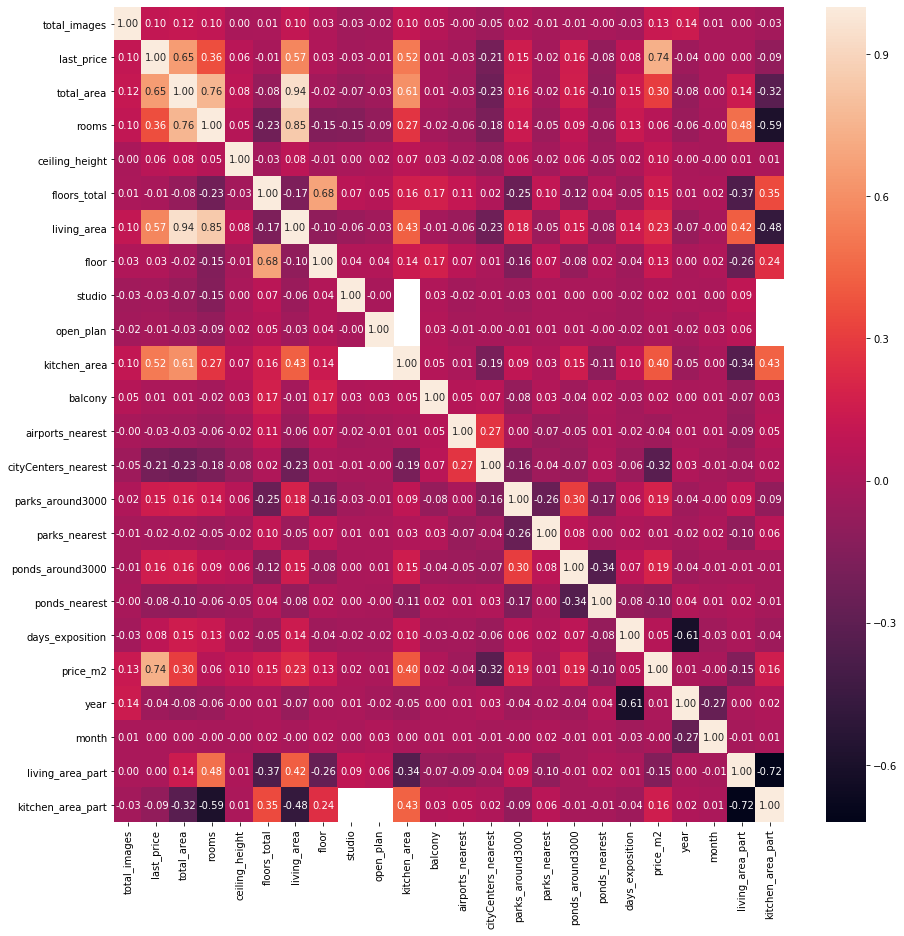

In [99]:
plt.figure(figsize=(15,15))
sns.heatmap(estate.corr(), annot=True, fmt='.2f')

Let's build a graph only for the column with the price, so that it can be seen which factors most strongly affect the price

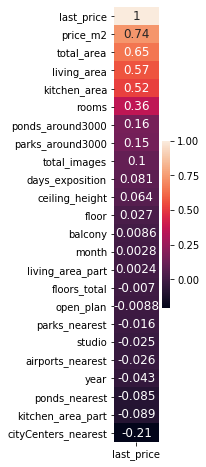

In [100]:
plt.figure(figsize=(1,8))
sns.heatmap(estate.corr()[['last_price']].sort_values(by='last_price', ascending=False), annot=True,  
            annot_kws={'size':12})

There is no point in saying the obvious (the > price of a meter, the > more the cost of an apartment, etc.), then: the
most significant factor is the distance from the center (the closer, the more expensive), the
less significant influence is: the presence of parks, reservoirs, number of floors, the number of images.
* The lower floors (but not the first) are in great demand  
If I were giving advice to real estate agencies, I would recommend actively using the synergy effect of small factors that together can increase the price of an ad: More pictures, more information about the area and the surrounding area. Fight for the sellers of the middle floors (and the last ones) in the central areas.

### 5. General conclusion <a name="paragraph5"></a>

#### The cost of an apartment is primarily affected by its:
- size;
- number of rooms;
- distance from the center;
- the first floor is the most unpopular, the last is the most expensive;
- apartments located in the center are expected to be more expensive. 2 km from the center, apartments are much more expensive even than other apartments in the central district;
#### Dependence of the price on the date of sale:
- ads placed at the end and beginning of the year have more opportunities to sell more expensive;
- 2014 was the most expensive year, after it there was a long stagnation, but in 2019 there was a slight increase, which is likely to be greatly strengthened by the crisis events of 2020;
- among the factors that affect the sale separately, it is not much - you can distinguish: good surroundings (parks, reservoirs), the proximity of the airport, the presence and number of images in the ad, the small number of floors of the house.

#### Time of sale of the apartment

- The average time of sale of an apartment is 127 days
- The median time of sale is 84 days
There are too large values in the list (more than 500 days) - you need to check the mechanism for tracking and deleting inactive ads.
There are also spikes in the schedule of closing ads on 40 and 60 days

#### Distribution by locality
- The most expensive apartments in St. Petersburg and Pushkin
- Vyborg closes the top ten leaders

#### Center
- The city center can be considered the areas located within a radius of 8 km from the Palace Square
- In these areas, the average parameters are slightly different from the citywide data:
* Ceiling height 2.7-3m
* Apartments of 2-3 rooms are sold more often (In general data, 1 room is the leader)
* The height of houses is lower-7 floors (Against 10)

In the center, the factors that affect the price also have differences from the citywide ones, but there is also a common one throughout the city:
- As in the whole city, the first floor is the cheapest, and the last one is expensive
- The distance from the formal city center in the central areas does not directly affect the price
- The time for the best sale of apartments also corresponds to the average city indicators

Thanks for your attention!